C:\Users\14698\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


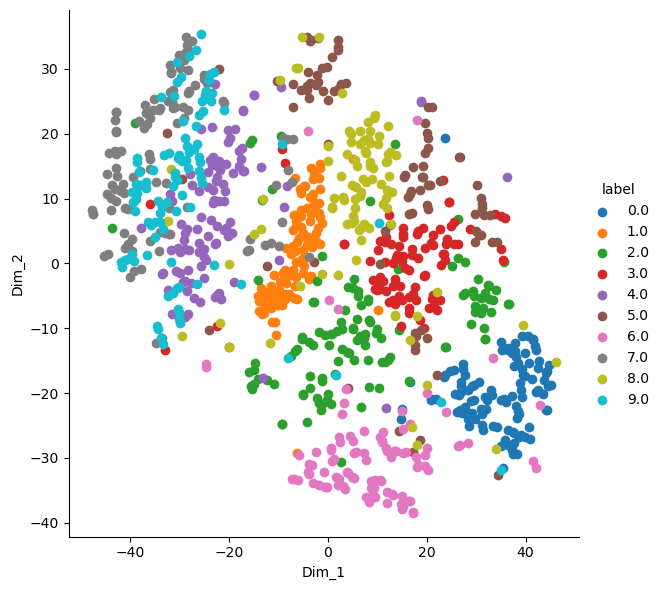

In [6]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sn

def run_TSNE(filename):
    # load in data file
    df = pd.read_csv(filename)

    # extract the labels and data
    label = df['label']
    dataset = df.drop("label",axis=1)

    # take only the first 15,000
    labels = label.head(15000)
    data = dataset.head(15000)

    # standardize the data
    standardized_data = StandardScaler().fit_transform(data)

    # pick the top 1,000 points
    data_1000 = standardized_data[0:1000,:]
    labels_1000 = labels[0:1000]

    # create the model
    model = TSNE(n_components=2, random_state=0)
    tsne_data = model.fit_transform(data_1000)

    # creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    
    # ploting the result data
    sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
    
run_TSNE("MNIST_train.csv")

C:\Users\14698\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


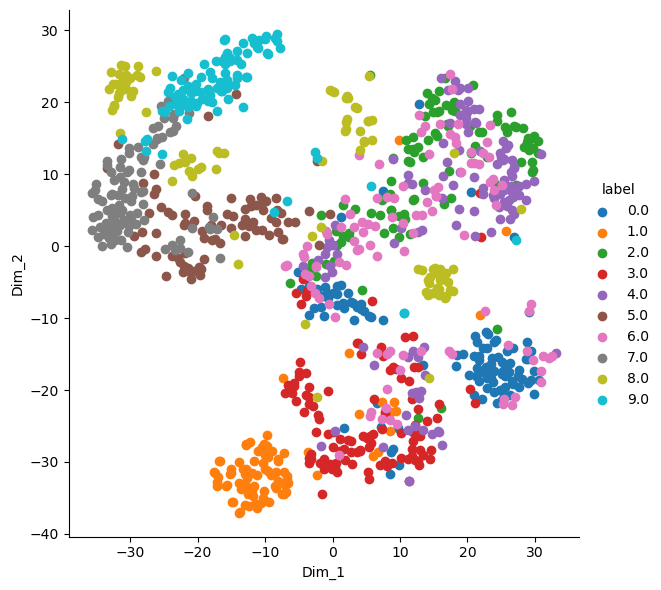

In [7]:
run_TSNE("Fashion-MNIST_train.csv")

C:\Users\14698\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


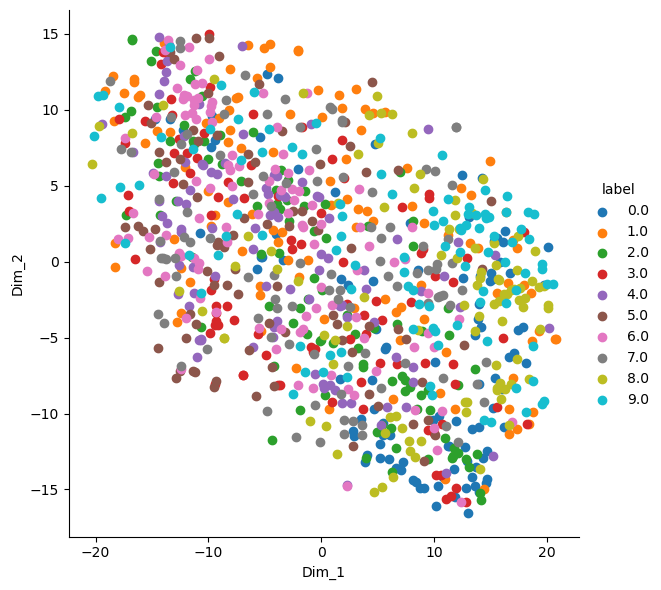

In [8]:
run_TSNE("CIFAR-10_train.csv")